# Business Problem

What makes people happy?

The World Happiness Report is a survey of the state of global happiness. The happiness scores (0-10) are based on answers to the main life evaluation question asked in the poll.

Happiness Score Columns:

GDP per Capita
Family
Life Expectancy
Freedom
Generosity
Trust Government Corruption
Distopya Residual Metric (Dystopia Happiness Score (1.85) + Residual Value

If we add all these factors up, we will get the happiness score so it might be un-reliable to model them to predict Hapiness Scores.

For more information about the Report or the Dataset, click here.

Our main goal is to do an descriptive analysis of the factors that make people happy.

# EDA

In [1]:
#Loading all the packages 


library(tidyverse) # Tidyverse package for several uses (pipeline, charts, operations, etc.)
library(ggplot2) # For charts
library(factoextra) # Clustering
library(FactoMineR) # Clustering # Heatmap chart
library(cluster) # Clustering
#library(Hmisc) # To impute values
library(corrplot) # Correlation Analysis
#library(GGally) 
library(repr)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

corrplot 0.84 loaded



In [2]:

data_2019 <- read.csv('../input/world-happiness/2019.csv')

data_2018<- read.csv('../input/world-happiness/2018.csv')

In [3]:
head(data_2019)
head(data_2018)

,Overall.rank,Country.or.region,Score,GDP.per.capita,Social.support,Healthy.life.expectancy,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption
,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
6,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343


,Overall.rank,Country.or.region,Score,GDP.per.capita,Social.support,Healthy.life.expectancy,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption
,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
2,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
3,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
4,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
5,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
6,6,Netherlands,7.441,1.361,1.488,0.878,0.638,0.333,0.295


In [4]:
# Checking missing values
sum(is.na(data_2018))
sum(is.na(data_2019))

[1] 0

[1] 0

In [5]:
#Last, but not least, due to the fact that the observations are ordered by Score, we will delete the Rank Variable.

data_2019$Overall.rank<- NULL
data_2018$Overall.rank <- NULL


In [6]:
# Update the rownames as the country name
row.names(data_2019) <- data_2019$`Country or region`
row.names(data_2018) <- data_2018$`Country or region`


In [7]:
#Perception of corruption is chr type and it should be dbl.

# Change Data Type

data_2018$Perceptions.of.corruption <- as.numeric(data_2018$Perceptions.of.corruption)

data_2019$Perceptions.of.corruption <- as.numeric(data_2019$Perceptions.of.corruption)


# We will focus on imputing the median value for corruption in the NA value introduced by the function above

#data_2018$Perceptions.of.corruption<- with(data_2018, impute(Perceptions.of.corruption, median))

In [8]:
head(data_2018)
head(data_2019)

,Country.or.region,Score,GDP.per.capita,Social.support,Healthy.life.expectancy,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,107
2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,103
3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,108
4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,78
5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,104
6,Netherlands,7.441,1.361,1.488,0.878,0.638,0.333,99


,Country.or.region,Score,GDP.per.capita,Social.support,Healthy.life.expectancy,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343


Changing names of columns for easier analysis

In [9]:
colnames(data_2018) <- c("Country", 'Score',"GDPP"," Social Support"," Life Expectancy","Freedom of Choice","Generosity","Corruption")
colnames(data_2019) <- c("Country", 'Score',"GDPP"," Social Support"," Life Expectancy","Freedom of Choice","Generosity","Corruption")

Removing Categorical or Characters columns for finding Coorelations.

In [10]:
corr_2018 <- cor(data_2018[,-1])
corr_2019 <- cor(data_2019[,-1])

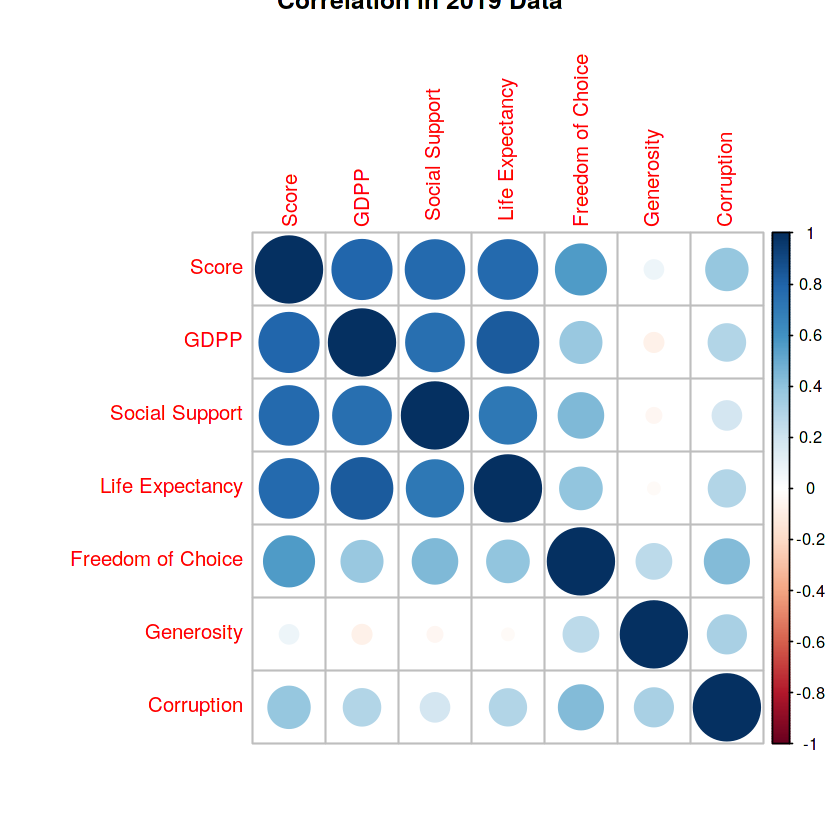

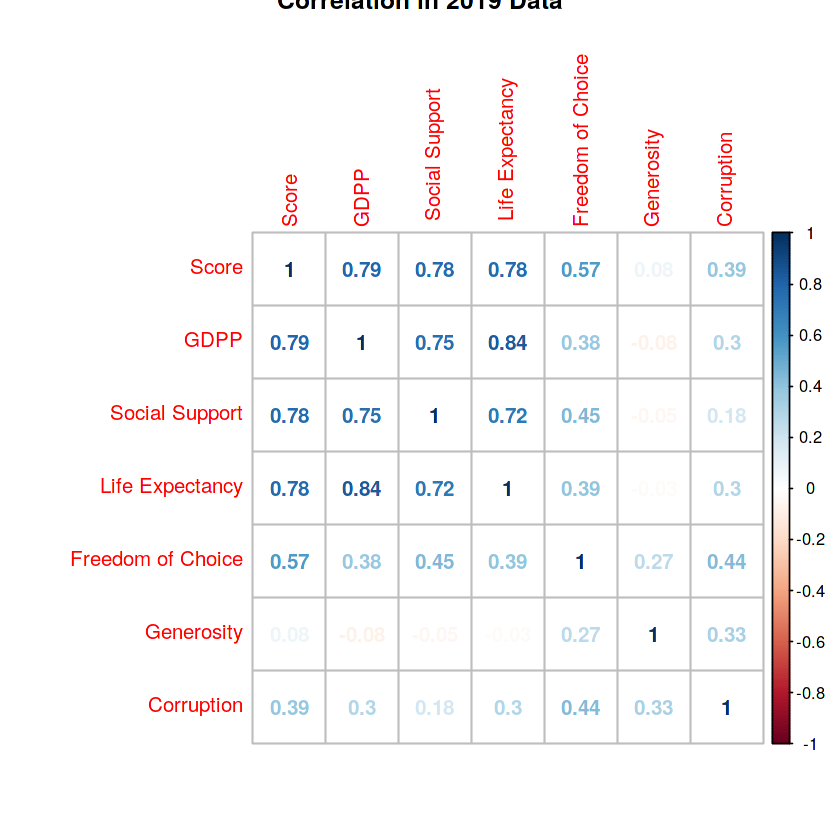

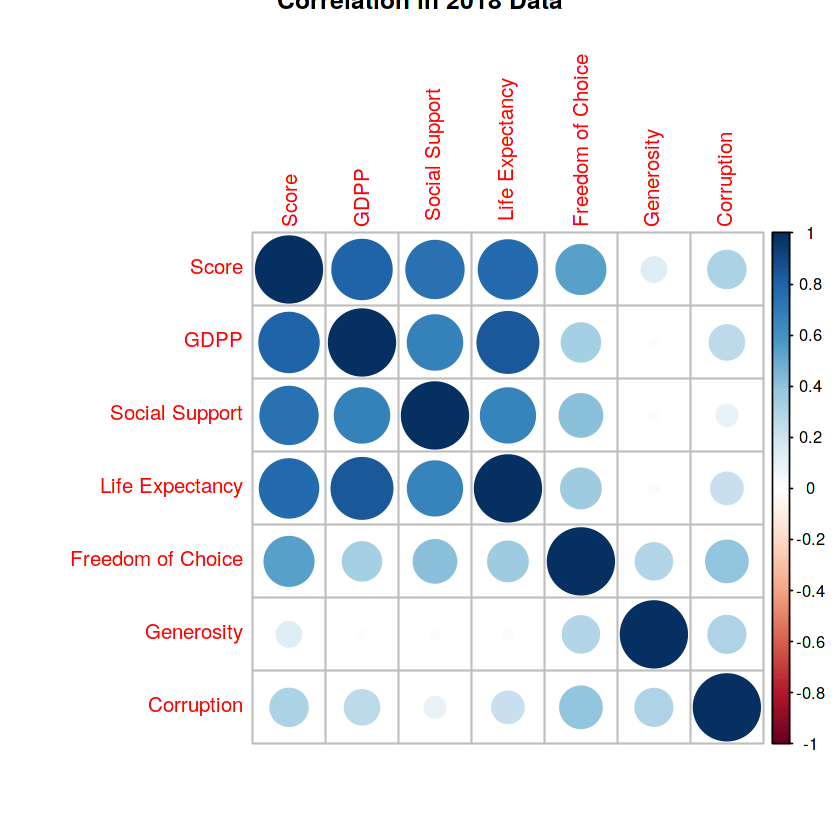

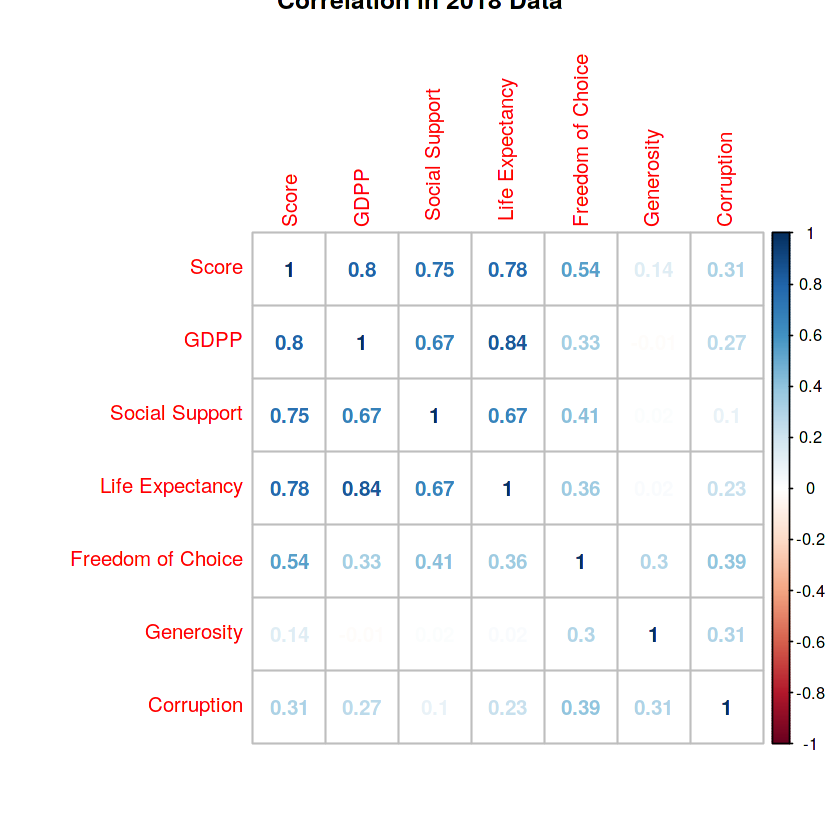

In [11]:
corrplot(corr_2019, method = "circle",title = "Correlation in 2019 Data")
corrplot(corr_2019, method = "number",title = "Correlation in 2019 Data")
corrplot(corr_2018, method = "circle",title = "Correlation in 2018 Data")
corrplot(corr_2018, method = "number",title = "Correlation in 2018 Data")



**From the above charts, we can obtain the following conclusions:**

* The Happiness Score is highly related with the GDP per Capita, Social Support and Healthy Life Expectancy.

* The Happines Score is NOT related at all with the Generosity Variable, which is (in my opinion) a surprise.

* We can see that in countries with High Level of GDP, they will have a High Life Expectancy and Family Support. So... Rich Countries will be the Happiest, live longer and have more family support.

* So, as a first conclusion, we could say that the Happiest Countries will be the ones with higher GDP per capita, Social Support and Life Expectancy and the other way around

# PCA Analysis

As seen above there exists a correlation among different inputs variables. We are going to do a PCA analysis in order to confirm the linear relation among the input variables.

To do this analysis, we are going to use the 2019 data.

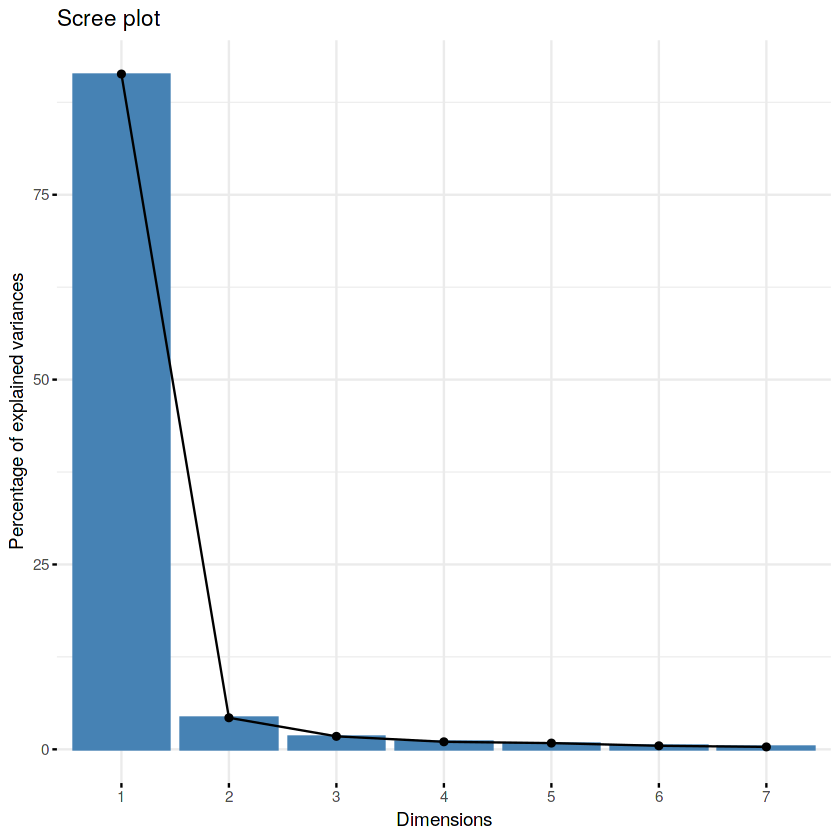

In [12]:
library(factoextra)

library(repr)

fit <- prcomp(data_2019[,-1],scale = FALSE)





fviz_eig(fit)


In [13]:
fit

Standard deviations (1, .., p=7):
[1] 1.20289784 0.25998362 0.16668403 0.12683127 0.11549774 0.08677289 0.07168339

Rotation (n x k) = (7 x 7):
                           PC1         PC2         PC3         PC4         PC5
Score             -0.921937392  0.36071683  0.06539190  0.12193257 -0.02680776
GDPP              -0.277661583 -0.77925519  0.36607994 -0.08506307 -0.40996418
 Social Support   -0.201517263 -0.34261222 -0.90235682 -0.02530306 -0.02482846
 Life Expectancy  -0.164052713 -0.34421020  0.13556030 -0.09664305  0.90768424
Freedom of Choice -0.067039981  0.11050318 -0.09775024 -0.81089056 -0.07554380
Generosity        -0.004534055  0.11116367  0.03230036 -0.39827601  0.02825673
Corruption        -0.029967885  0.04703841  0.13596513 -0.38955016 -0.01408109
                            PC6          PC7
Score              0.0009302466  0.007186407
GDPP              -0.0155510811  0.078119678
 Social Support   -0.1355739113 -0.090126780
 Life Expectancy   0.0521571474  0.016688985

In [14]:
head(data_2019[,-(1:2)])


,GDPP,Social Support,Life Expectancy,Freedom of Choice,Generosity,Corruption
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.340,1.587,0.986,0.596,0.153,0.393
2,1.383,1.573,0.996,0.592,0.252,0.410
3,1.488,1.582,1.028,0.603,0.271,0.341
4,1.380,1.624,1.026,0.591,0.354,0.118
5,1.396,1.522,0.999,0.557,0.322,0.298
6,1.452,1.526,1.052,0.572,0.263,0.343


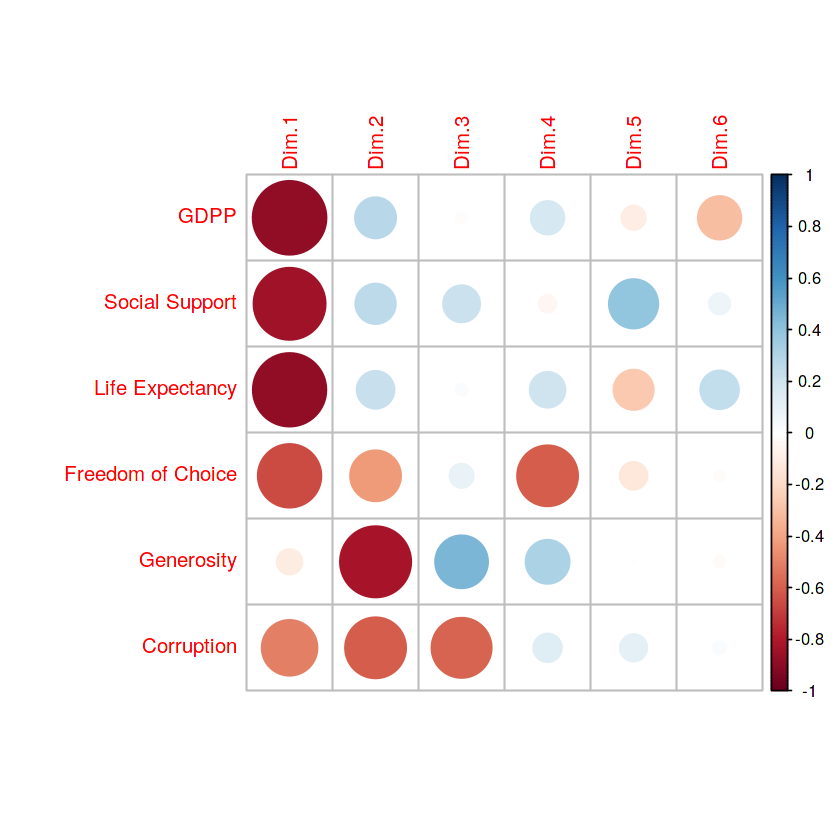

In [15]:

fit2 <- prcomp(data_2019[,-(1:2)], scale = TRUE )

var <- get_pca_var(fit2)

corrplot(var$cor)


From the below we can conclude from our earlier Corelation plot that GDP,Social Support and Life Expectancy are associated with Happiness according to the report.

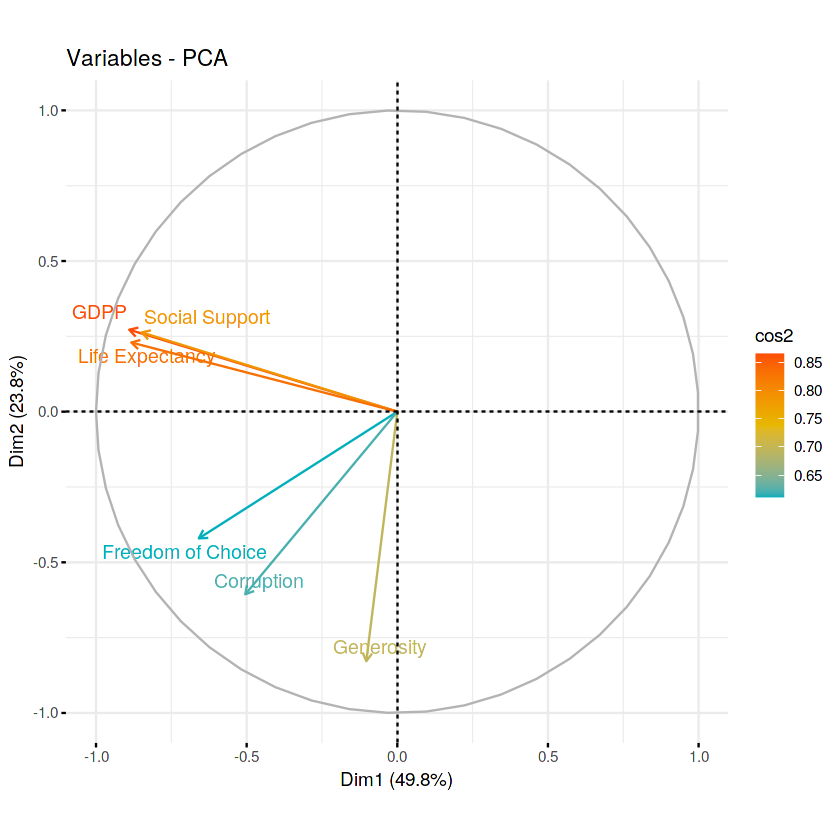

In [16]:
fviz_pca_var(fit2, axes = c(1,2) ,col.var = "cos2", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)

We order the countries in the data frame as it helps for later clustering

In [17]:
data_2019 <- data_2019[order(data_2019$Country),]
data_2018 <- data_2018[order(data_2018$Country),]


For using K- means clustering we need to remove characters and scale the numeric values for easier Clustering of groups

In [18]:
df_2019_numeric <- data_2019 %>% select(c(-Country))
df_2018_numeric <- data_2018 %>% select(c(-Country))


We scale the numeric columns as a precursor for the Clustering

In [19]:
df_2019_scaled <- scale(df_2019_numeric)
df_2018_scaled <- scale(df_2018_numeric)

In [20]:
head(df_2019_scaled)

,Score,GDPP,Social Support,Life Expectancy,Freedom of Choice,Generosity,Corruption
154,-1.9801067,-1.3934792,-2.3122794,-1.5043680,-2.73970244,-0.28183625,-0.90548471
107,-0.6181690,0.1050544,-1.2059641,0.6143811,-0.06679146,-0.07187228,-0.88432916
88,-0.1761680,0.2431103,-0.1631534,0.2468009,-2.13951877,-1.17418310,0.03593731
47,0.6099108,0.4690198,0.7459636,0.6432919,0.54734997,-1.24767048,-0.64104032
116,-0.7619091,-0.1384259,-0.5140993,0.3707043,-0.76467944,-0.94322273,-0.49295146
11,1.6358560,1.1718497,1.1336753,1.2834598,1.14753364,1.54485025,1.89762580


# K-Means Clustering

K-means clusterting has 3 ways to know the ideal number of clusters.
They are :

* Elblow
* Sihoutte
* Gap Stat method

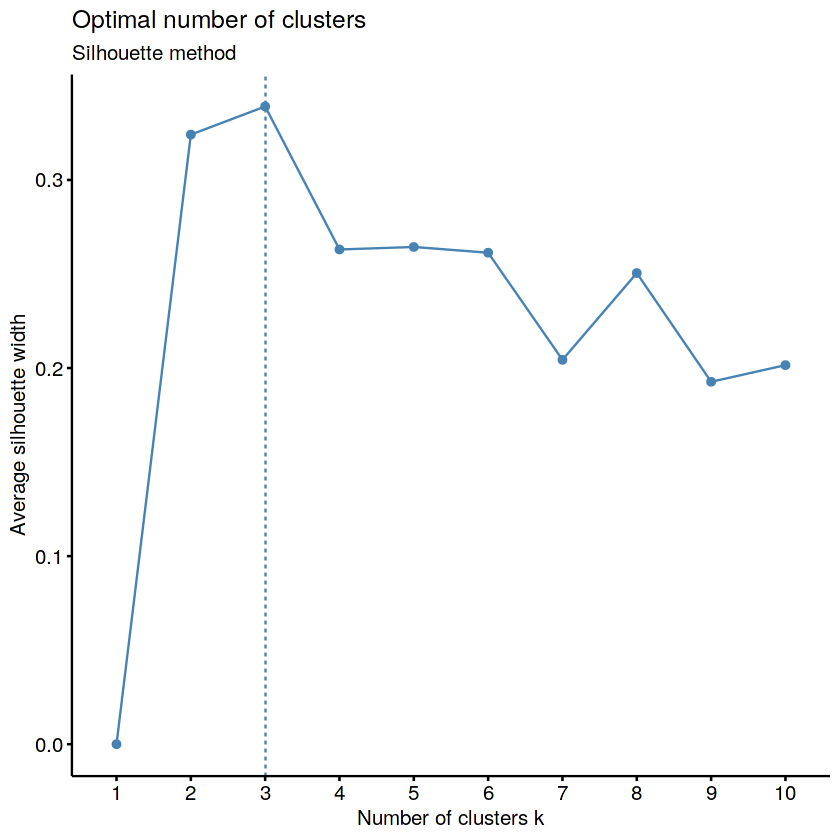

In [21]:
#Silhouette and the Elbow Methods to find out which is the correct cluster's number.
fviz_nbclust(df_2019_scaled, kmeans, method = "silhouette")+
    labs(subtitle = "Silhouette method") # 3 Clusteres


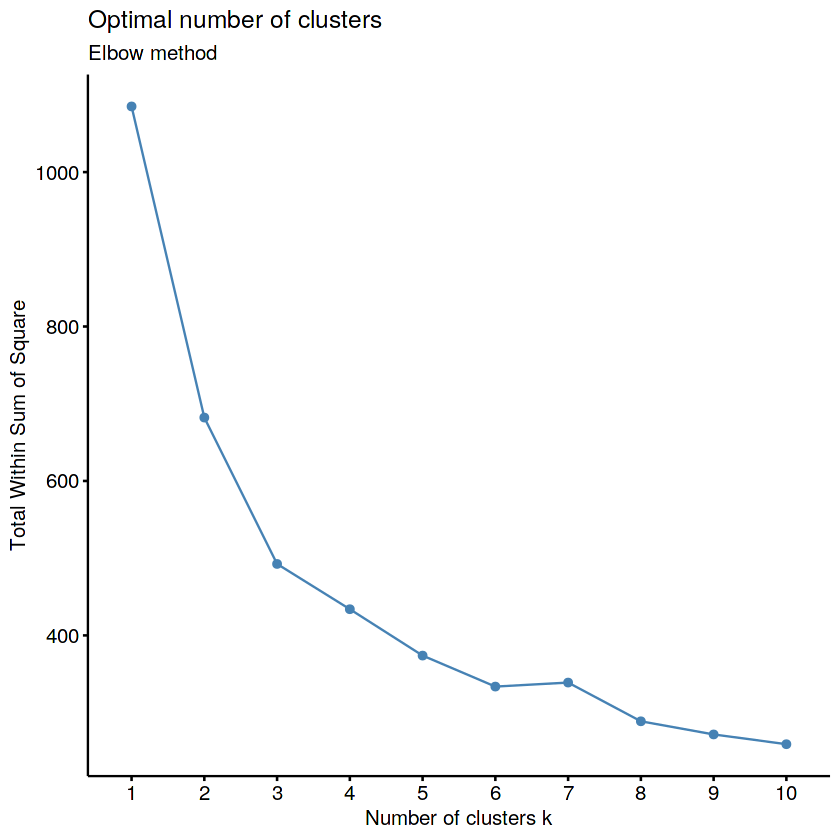

In [22]:
fviz_nbclust(df_2019_scaled, kmeans, method = "wss")+
    labs(subtitle = "Elbow method")

In [23]:
#compute gap statistic
set.seed(123)
gap_stat <- clusGap(df_2019_scaled, FUN = kmeans, nstart = 25,
                    K.max = 10, B = 50)
# Print the result
print(gap_stat, method = "firstmax")

Clustering Gap statistic ["clusGap"] from call:
clusGap(x = df_2019_scaled, FUNcluster = kmeans, K.max = 10,     B = 50, nstart = 25)
B=50 simulated reference sets, k = 1..10; spaceH0="scaledPCA"
 --> Number of clusters (method 'firstmax'): 7
          logW   E.logW       gap     SE.sim
 [1,] 4.895987 5.346589 0.4506017 0.01983598
 [2,] 4.667904 5.145858 0.4779537 0.01841716
 [3,] 4.505048 5.052936 0.5478877 0.01551375
 [4,] 4.423409 4.982579 0.5591697 0.01419401
 [5,] 4.360089 4.930776 0.5706876 0.01405162
 [6,] 4.311231 4.885139 0.5739079 0.01354620
 [7,] 4.267690 4.844612 0.5769220 0.01313689
 [8,] 4.236282 4.808458 0.5721760 0.01343354
 [9,] 4.193526 4.775786 0.5822600 0.01377231
[10,] 4.168618 4.746226 0.5776080 0.01342448


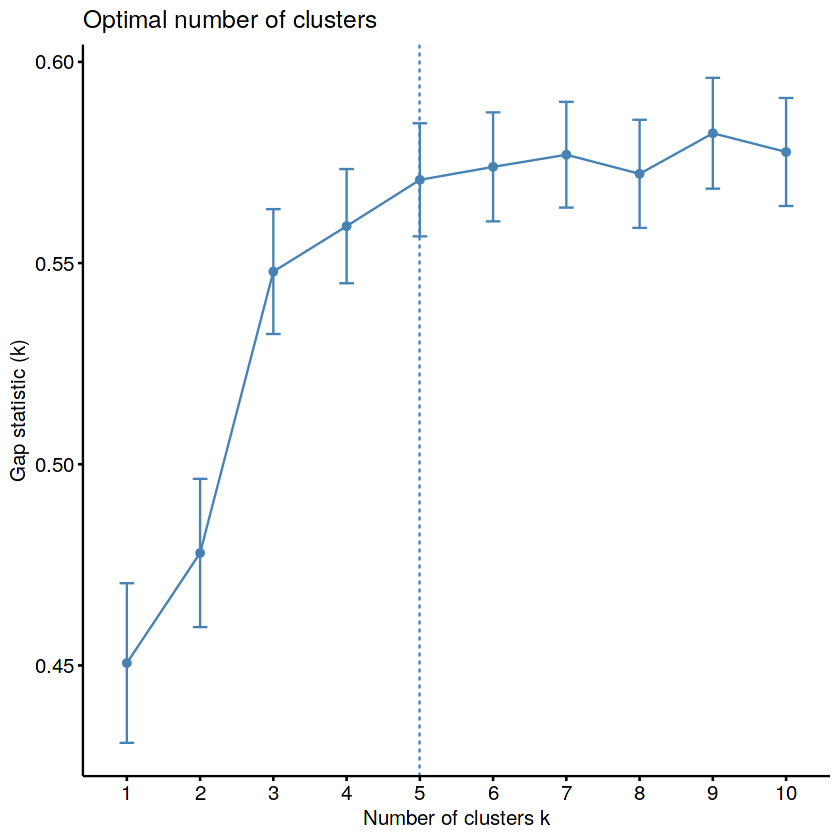

In [24]:
fviz_gap_stat(gap_stat)

**Elbow and Silhoutte methods have shown that 3 is the ideal number of clusters.However since there are almost 160 nations,it would be more appropriate to have 4 clusters for better visibility and understanding of data**

We impart country names to the scaled dataframe so that we can get names of the countries in the clusters instead of just numbers

In [25]:
df_final_2019 <- df_2019_scaled
rownames(df_final_2019) <- data_2019$Country

In [26]:
df_final_2018<-df_2018_scaled
rownames(df_final_2018) <- data_2018$Country

In [27]:
head(df_final_2019)
head(df_final_2018)

,Score,GDPP,Social Support,Life Expectancy,Freedom of Choice,Generosity,Corruption
Afghanistan,-1.9801067,-1.3934792,-2.3122794,-1.5043680,-2.73970244,-0.28183625,-0.90548471
Albania,-0.6181690,0.1050544,-1.2059641,0.6143811,-0.06679146,-0.07187228,-0.88432916
Algeria,-0.1761680,0.2431103,-0.1631534,0.2468009,-2.13951877,-1.17418310,0.03593731
Argentina,0.6099108,0.4690198,0.7459636,0.6432919,0.54734997,-1.24767048,-0.64104032
Armenia,-0.7619091,-0.1384259,-0.5140993,0.3707043,-0.76467944,-0.94322273,-0.49295146
Australia,1.6358560,1.1718497,1.1336753,1.2834598,1.14753364,1.54485025,1.89762580


,Score,GDPP,Social Support,Life Expectancy,Freedom of Choice,Generosity,Corruption
Afghanistan,-1.55775574,-1.42745296,-2.2364421,-1.3827767,-2.2749452,0.1014881,-1.0744578
Albania,-0.70559405,0.06264345,-1.3104300,0.7781517,-0.2186028,-0.3250352,-1.1734238
Algeria,-0.07227891,0.22339016,-0.1959084,0.3621225,-2.3241989,-1.2796349,0.7729076
Angola,-1.41215579,-0.41194205,-0.2918168,-1.3262290,-2.7982658,-1.0359073,-0.5466391
Argentina,0.90404470,0.46323444,0.8425480,0.5923523,0.7110610,-1.2085477,-0.7115825
Armenia,-0.94230563,-0.19251004,-0.7382869,0.2773010,-1.1975203,-1.0562180,-1.3053785


**2019 Report Clustering**

In [28]:
set.seed(123)
final_2019 <- kmeans(df_final_2019, 4, nstart = 25)
print(final_2019)

K-means clustering with 4 clusters of sizes 23, 34, 50, 49

Cluster means:
       Score       GDPP  Social Support  Life Expectancy Freedom of Choice
1  1.4522358  1.2298004      0.95624052        1.0954497         1.0838134
2 -0.3235810  0.2107742      0.06373262        0.1498646        -0.9108254
3  0.5249065  0.4368403      0.57149336        0.5366523         0.4786778
4 -0.9927550 -1.1692601     -1.07622671       -1.1657828        -0.3651742
  Generosity  Corruption
1  0.9450836  1.80426544
2 -0.8635599 -0.50041813
3 -0.3055622 -0.40007859
4  0.4673923 -0.09142774

Clustering vector:
             Afghanistan                  Albania                  Algeria 
                       4                        2                        2 
               Argentina                  Armenia                Australia 
                       3                        2                        1 
                 Austria               Azerbaijan                  Bahrain 
                       1 

# Cluster Plot - 2019 data

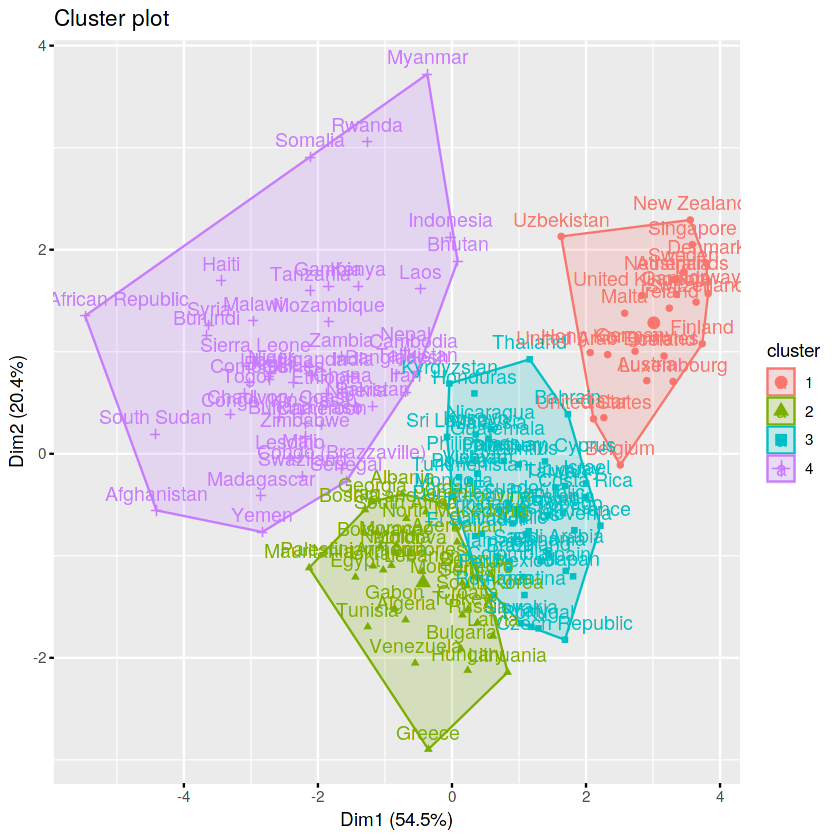

In [29]:
fviz_cluster(final_2019, data = df_final_2019)

Below we will link the countries with associated clusters they belong to

In [30]:
cluster_data <- as.data.frame(final_2019$cluster)

head(cluster_data)

,final_2019$cluster
,<int>
Afghanistan,4
Albania,2
Algeria,2
Argentina,3
Armenia,2
Australia,1


In [31]:
total_df_2019 <- cbind(data_2019,cluster_data)
colnames(total_df_2019)[9] <- "cluster"
head(total_df_2019)

,Country,Score,GDPP,Social Support,Life Expectancy,Freedom of Choice,Generosity,Corruption,cluster
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,4
107,Albania,4.719,0.947,0.848,0.874,0.383,0.178,0.027,2
88,Algeria,5.211,1.002,1.160,0.785,0.086,0.073,0.114,2
47,Argentina,6.086,1.092,1.432,0.881,0.471,0.066,0.050,3
116,Armenia,4.559,0.850,1.055,0.815,0.283,0.095,0.064,2
11,Australia,7.228,1.372,1.548,1.036,0.557,0.332,0.290,1


We try to aggregate the clusters with associated values and we find necessary differences

In [32]:
aggregate(total_df_2019[, 2:9], list(total_df_2019$cluster), mean)

Group.1,Score,GDPP,Social Support,Life Expectancy,Freedom of Choice,Generosity,Corruption,cluster
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7.023609,1.3950870,1.4949130,0.9904783,0.5478696,0.2748696,0.28117391,1
2,5.046912,0.9891176,1.2278824,0.7615294,0.2620588,0.1025882,0.06329412,2
3,5.991380,1.0791800,1.3798000,0.8551800,0.4611600,0.1557400,0.07278000,3
4,4.302041,0.4393265,0.8868163,0.4429796,0.3402449,0.2293673,0.10195918,4


In [33]:
total_df_2019$cluster <- factor(total_df_2019$cluster)

In [34]:
total_df_2019$cluster <- recode(total_df_2019$cluster, '1' = "Happy", '2' = "Moderate", '3' = "Sad",'4'= 'Troubled')

**2018 Report Clustering**

In [35]:
set.seed(123)
final_2018 <- kmeans(df_final_2018, 4, nstart = 25)
print(final_2018)

K-means clustering with 4 clusters of sizes 32, 41, 60, 23

Cluster means:
        Score       GDPP  Social Support  Life Expectancy Freedom of Choice
1  1.26957986  1.1620361       0.8309729       1.04233532         0.8990331
2 -1.13481217 -1.2566246      -1.1727382      -1.32248547        -0.6030220
3  0.12389395  0.3373587       0.3306508       0.36717141        -0.2843770
4 -0.06664755 -0.2567422       0.0718299      -0.05057003         0.5659767
   Generosity  Corruption
1  0.68065842  1.26670667
2  0.03783157 -0.03571709
3 -0.75426656 -0.55708554
4  0.95320999 -0.24543826

Clustering vector:
             Afghanistan                  Albania                  Algeria 
                       2                        3                        3 
                  Angola                Argentina                  Armenia 
                       2                        3                        3 
               Australia                  Austria               Azerbaijan 
               

# Cluster Plot - 2018 data

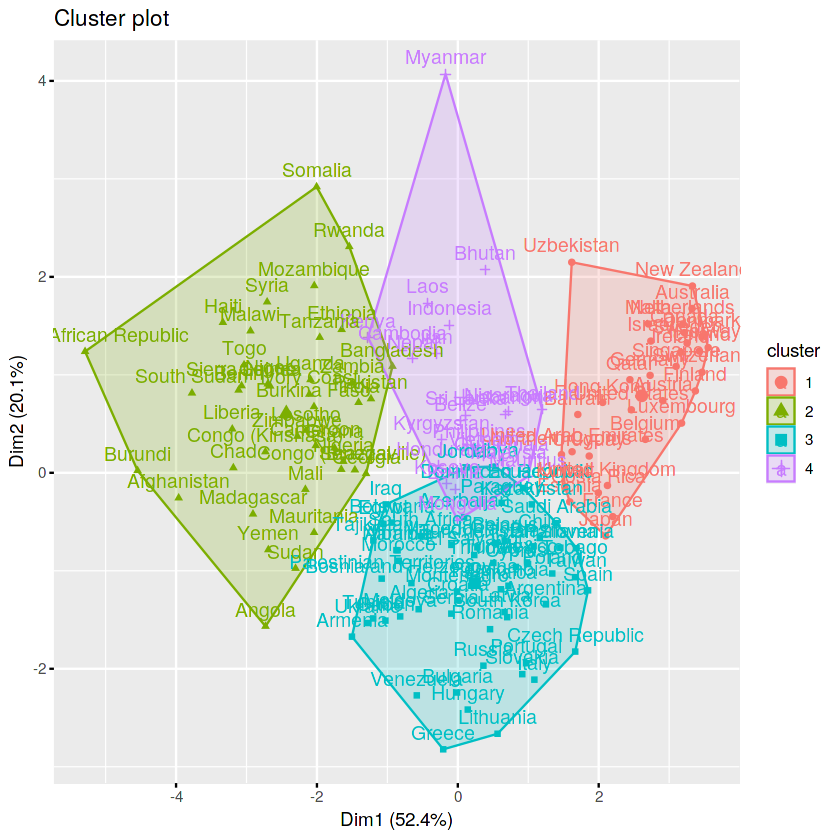

In [36]:
fviz_cluster(final_2018, data = df_final_2018)

In [37]:
cluster_data_2018 <- as.data.frame(final_2018$cluster)

head(cluster_data_2018)

,final_2018$cluster
,<int>
Afghanistan,2
Albania,3
Algeria,3
Angola,2
Argentina,3
Armenia,3


In [38]:
total_df_2018 <- cbind(data_2018,cluster_data_2018)
colnames(total_df_2018)[9] <- "cluster"
head(total_df_2018)

,Country,Score,GDPP,Social Support,Life Expectancy,Freedom of Choice,Generosity,Corruption,cluster
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
145,Afghanistan,3.632,0.332,0.537,0.255,0.085,0.191,20,2
112,Albania,4.586,0.916,0.817,0.790,0.419,0.149,17,3
84,Algeria,5.295,0.979,1.154,0.687,0.077,0.055,76,3
142,Angola,3.795,0.730,1.125,0.269,0.000,0.079,36,2
29,Argentina,6.388,1.073,1.468,0.744,0.570,0.062,31,3
129,Armenia,4.321,0.816,0.990,0.666,0.260,0.077,13,3


In [39]:
total_df_2018$cluster <- factor(total_df_2018$cluster)
total_df_2018$cluster <- recode(total_df_2019$cluster, '1' = "Happy", '2' = "Troubled", '3' = "Moderate",'4'= 'Sad')

In [40]:
write.csv(total_df_2019, "clustering_2019.csv", row.names = F)
write.csv(total_df_2018,'clustering_2018_new.csv',row.names = F)

# State of Happiness - 2018 

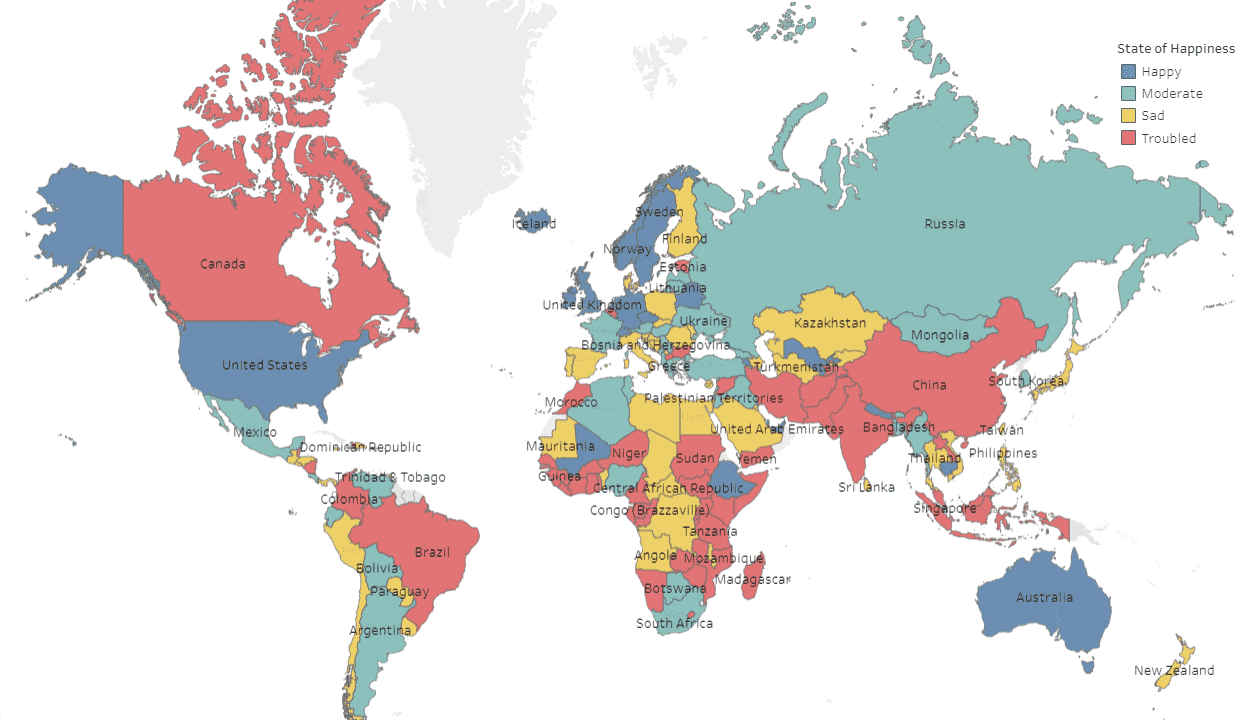

# State of Happiness - 2019

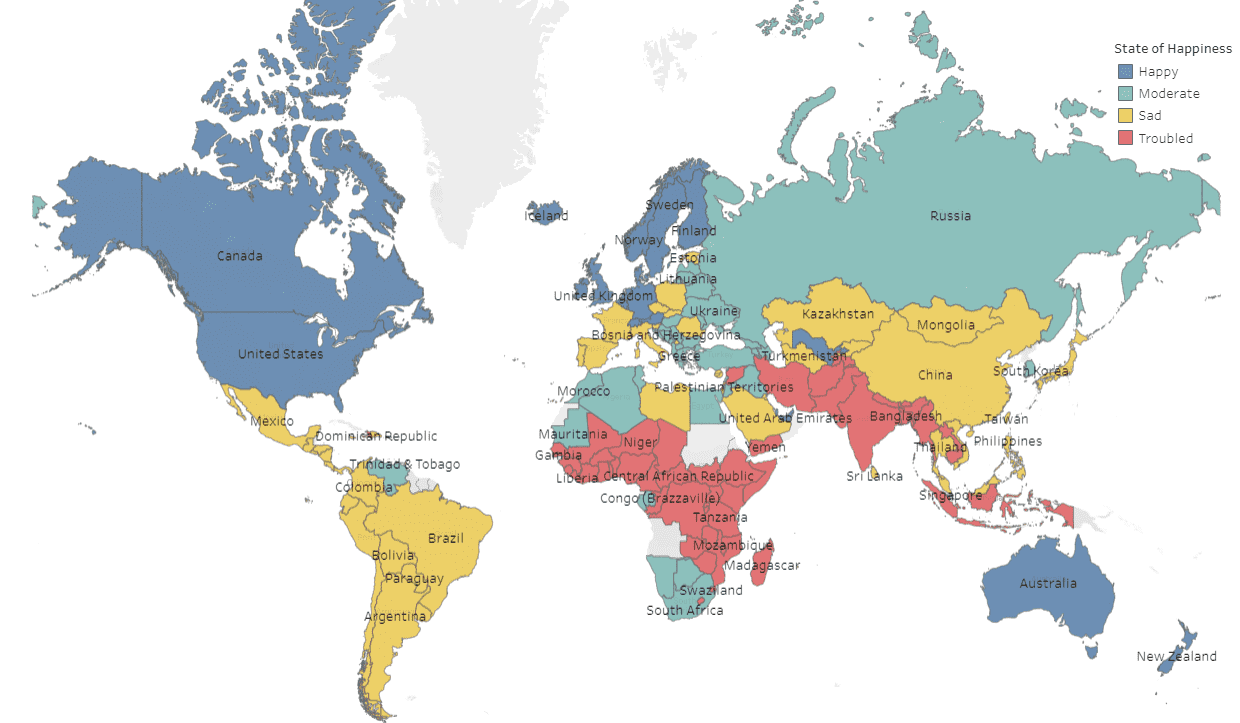